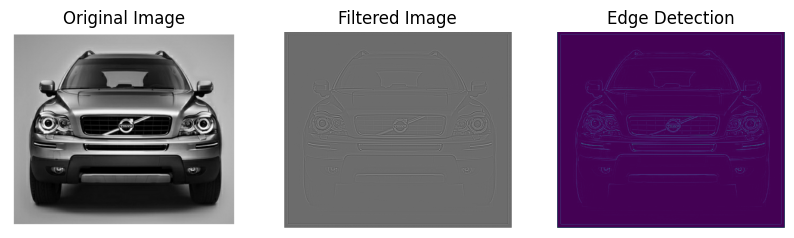

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load a sample image (MNIST)
(image, _), _ = tf.keras.datasets.mnist.load_data()
image = cv2.imread('./data/img.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = tf.expand_dims(image, axis=-1)  # add channel dimension
image = tf.image.convert_image_dtype(image, tf.float32)  # normalize to [0,1]

# Define the kernel (Edge detection / Laplacian)
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

# Prepare image and kernel for convolution
image_batch = tf.expand_dims(image, axis=0)  # [1, H, W, C]
kernel_conv = tf.reshape(kernel, [*kernel.shape, 1, 1])  # [H, W, in_channels, out_channels]

# Apply convolution
image_filter = tf.nn.conv2d(
    input=image_batch,
    filters=kernel_conv,
    strides=1,
    padding='SAME'
)

image_detect = tf.nn.relu(image_filter)

# Plot original and filtered image side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title("Original Image")

# Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.axis('off')
plt.title("Filtered Image")

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_detect))
plt.title("Edge Detection")
plt.axis('off')
plt.show()




In [19]:
# For a proper understanding of convolution, we will use a simple image
import sympy
sympy.init_printing()
from IPython.display import display
import numpy as np

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

print("Image:")
display(sympy.Matrix(image))
print("Kernel:")
display(sympy.Matrix(kernel))
# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

# The first matrix is the image after convolution, and the second is
# the image after ReLU.
print("Image after convolution:")
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
print("Image after ReLU:")
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))


Image:


⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

Kernel:


⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

Image after convolution:


⎡-2.0  2.0   0    0  0⎤
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0  -1.0  0  0⎥
⎢                     ⎥
⎣-2.0  2.0  -1.0  0  0⎦

Image after ReLU:


⎡0  2.0  0  0  0⎤
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎣0  2.0  0  0  0⎦